<a href="https://colab.research.google.com/github/eduardodpms/CIS_Notebooks/blob/main/Trainee/Per%C3%ADodo%201%20(Classifica%C3%A7%C3%A3o%20e%20Regress%C3%A3o)/Classifica%C3%A7%C3%A3o/CIS_Trainee_Cla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trainee CIS (1° Período) - Classificação***

Informações do aluno:

- **Nome**: Eduardo de Pina Moreira Santos
- **Matrícula**: 231034494
- **Curso**: Engenharia de Software (FCTE)
- **E-mail**: eduardopms19@hotmail.com

## **1. Introdução**

Este trabalho corresponde ao desenvolvimento da segunda atividade do 1° período do processo de *Trainee* do capítulo estudantil do [*Computational Intelligence Society*](https://cis.ieee.org) do *IEEE*, na [Universidade de Brasília](https://www.unb.br). Demais informações do *Trainee* estão disponíveis no [*GitHub*](https://github.com/UnB-CIS/Trainee/tree/main). O foco dessa atividade é a elaboração de dois modelos de classificação simples, utilizando bibliotecas do [*Python*](https://www.python.org) como [*Pandas*](https://pandas.pydata.org), [*Matplotlib*](https://matplotlib.org), [*seaborn*](https://seaborn.pydata.org), [*scikit-learn*](https://scikit-learn.org) e [*NumPy*](https://numpy.org). O conjunto de dados de treino é o *Adult Census Income*⁽¹⁾, organizado pela [*UCI*](https://archive.ics.uci.edu) e disponível no [*Kaggle*](https://www.kaggle.com).

O *dataset* traz 32.561 tuplas, as quais relacionam 14 diferentes atributos sociais de adultos à sua renda anual (dividida em **<=50K** e **>50K**), de acordo com um Censo americano realizado em 1994. O objetivo será o desenvolvimento de dois modelos de árvore de classificação distintos, o *Decision Tree* e o *Random Forest*, a fim de testar as habilidades do aluno no que tange à abordagem desses modelos.

## **2. Análise, Imputação e Codificação do *Dataset***

### 2.1. Importação das bibliotecas

In [ ]:
# Importação das bibliotecas de visualização e manipulação dos dados
import pandas as pd # Manipulação de arquivos
import matplotlib.pyplot as plt # Geração de figuras
import seaborn as sns # Visualização estatística
import numpy as np # Manipulação de arrays

In [ ]:
# Importanção das bibliotecas gerais para os dois modelos
from sklearn.preprocessing import LabelEncoder # Pré-Processamento de dados
from sklearn.model_selection import GridSearchCV, train_test_split # Classes de otimização e de splitting
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusão

### 2.2. Importação do *dataset* e análise inicial

In [ ]:
# Importação e visualização do dataset
data = pd.read_csv(filepath_or_buffer='adult.csv') # Tranfere o conjunto de dados para um Dataframe, com o auxílio da biblioteca Pandas

print(f'{data.to_string(max_rows=16)}') # Apresenta as n primeiras e n últimas linhas da relação

       age  workclass  fnlwgt     education  education.num      marital.status         occupation    relationship                race     sex  capital.gain  capital.loss  hours.per.week native.country income
0       90          ?   77053       HS-grad              9             Widowed                  ?   Not-in-family               White  Female             0          4356            40.0  United-States  <=50K
1       82    Private  132870       HS-grad              9             Widowed    Exec-managerial   Not-in-family               White  Female             0          4356            18.0  United-States  <=50K
2       66          ?  186061  Some-college             10             Widowed                  ?       Unmarried               Black  Female             0          4356            40.0  United-States  <=50K
3       54    Private  140359       7th-8th              4            Divorced  Machine-op-inspct       Unmarried               White  Female             0          390

In [ ]:
data.info() # Distribuição dos elementos no dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24918 entries, 0 to 24917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             24918 non-null  int64  
 1   workclass       24918 non-null  object 
 2   fnlwgt          24918 non-null  int64  
 3   education       24918 non-null  object 
 4   education.num   24918 non-null  int64  
 5   marital.status  24918 non-null  object 
 6   occupation      24918 non-null  object 
 7   relationship    24918 non-null  object 
 8   race            24918 non-null  object 
 9   sex             24918 non-null  object 
 10  capital.gain    24918 non-null  int64  
 11  capital.loss    24918 non-null  int64  
 12  hours.per.week  24917 non-null  float64
 13  native.country  24917 non-null  object 
 14  income          24917 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 2.9+ MB


A observação da contagem de elementos nulos, com o método *info* na célula anterior, aponta para a inexistência dos mesmos em todo o *dataset*. Entretanto, a prévia da relação apresentada pelo método *to_string* mostra que há dados faltantes, os quais foram substituídos por "?". Isso significa que será necessário algum tipo de imputação, isto é, alguma forma de lidar com essa carência antes do treinamento.

### 2.3. Imputação pela moda

Um dos tipos mais comuns de imputação é a pela moda, a qual consiste em substituir os dados faltantes ou *outliers* expressivos pelo elemento que corresponde à moda daquele atributo. É uma técnica comum no tratamento de conjuntos de dados categóricos, isto é, dados cujo valor não é numérico, o que significa que sua média não pode ser calculada para a imputação.

In [ ]:
data_new = data.copy(deep = True) # Salvando o Dataframe que sofrerá tratamento em "data_new"

data_new.replace('?', np.nan, inplace=True) # Substituindo "?" por "NaN"

In [ ]:
# Imputação pela Moda em cada dado faltante
for col in data_new.columns:
  mode_val = data[col].mode()[0] # Separa a moda do atributo
  data_new[col] = data_new[col].fillna(mode_val) # Substitui "NaN" pela moda

In [ ]:
print(f'{data_new.to_string(max_rows=10)}') # Apresenta as n primeiras e n últimas linhas da relação

       age workclass  fnlwgt     education  education.num      marital.status         occupation   relationship                race     sex  capital.gain  capital.loss  hours.per.week native.country income
0       90   Private   77053       HS-grad              9             Widowed     Prof-specialty  Not-in-family               White  Female             0          4356            40.0  United-States  <=50K
1       82   Private  132870       HS-grad              9             Widowed    Exec-managerial  Not-in-family               White  Female             0          4356            18.0  United-States  <=50K
2       66   Private  186061  Some-college             10             Widowed     Prof-specialty      Unmarried               Black  Female             0          4356            40.0  United-States  <=50K
3       54   Private  140359       7th-8th              4            Divorced  Machine-op-inspct      Unmarried               White  Female             0          3900         

Observa-se, na prévia, que alguns dos dados "?" foram substituídos pela moda do atributo.

### 2.4. Codificação dos atributos

A codificação, ou *encoding*, é uma etapa essencial no que tange à preparação dos atributos categóricos. De forma resumida, nela, as variáveis não numéricas são substituídas por números sem um padrão específico, a fim de que o modelo seja capaz de "compreender" os dados iguais ou semelhantes de forma eficiente, preservando as características e propriedades iniciais do atributo.

In [ ]:
# Codificação dos atributos categóricos

# Separando os labels dos atributos categóricos
cat_cols = data_new.select_dtypes(include='object').columns

# Codificando cada atributo individualmente
for col in cat_cols:
    le = LabelEncoder() # Chama o método de codificação
    data_new[col] = le.fit_transform(data_new[col]) # Aplica a codificação no atributo

In [ ]:
print(f'{data_new.to_string(max_rows=10)}') # Apresenta as n primeiras e n últimas linhas da relação

       age  workclass  fnlwgt  education  education.num  marital.status  occupation  relationship  race  sex  capital.gain  capital.loss  hours.per.week  native.country  income
0       90          3   77053         11              9               6           9             1     4    0             0          4356            40.0              38       0
1       82          3  132870         11              9               6           3             1     4    0             0          4356            18.0              38       0
2       66          3  186061         15             10               6           9             4     2    0             0          4356            40.0              38       0
3       54          3  140359          5              4               0           6             4     4    0             0          3900            40.0              38       0
4       41          3  264663         15             10               5           9             3     4    0       

### 2.5. Disposição do *dataset* pré-treinamento

Aqui, separa-se o *dataset* em conjuntos de treino e teste de acordo com os parâmetros definidos na próxima célula.

In [ ]:
# Parâmetros Gerais
test_size = 0.2 # Proporção de dados de teste em relação ao tamanho do dataset
random_state = 42 # Dita como o modelo aleatorizará os dados de treino

In [ ]:
# Separando features e target
x = data_new.drop('income', axis=1)
y = data_new['income']

# Separando conjuntos de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

## **3. Modelo Decision Tree**

*Decision Tree*⁽²⁾ é um modelo de classificação supervisionado, baseado na estrutura de raiz, nós internos, folhas e galhos. Com uma estrutura simples, traz vantagens como não necessitar de escalonação dos dados, lidar bem com variáveis correlacionadas, e necessitar de uma quantidade menor de parametrizações. Baseado nos nós de decisão, o modelo se torna capaz de realizar previsões.

### 3.1. Preparação para o treinamento

In [ ]:
# Importação de bibliotecas relacionadas ao modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier # Classificador (Árvore de Decisão)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Métricas de avaliação

In [ ]:
# Definição dos hiperparâmetros para o GridSearch
dt_param_grid = {
    'max_depth': [10, 20, 30], # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 5], # Número mínimo de amostras por folha
    'criterion': ['gini', 'entropy'] # Função de impureza
}

In [ ]:
# Criação do modelo de classificação
dt = DecisionTreeClassifier(random_state=random_state)

### 3.2. *GridSearch* e treinamento

O *GridSearch*⁽⁴⁾ é uma ferramenta que permite a execução de uma Validação Cruzada no conjunto de parâmetros definido anteriormente. Assim, será possível definir os parâmetros que maximizam a eficácia do modelo, dentre os fornecidos.

In [ ]:
# Aplicação do GridSearch com validação cruzada
dt_grid = GridSearchCV(estimator = dt, param_grid = dt_param_grid, n_jobs = -1) # Prepara o GridSearch
dt_grid.fit(x_train, y_train) # Executa o GridSearch no conjunto de treino

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Visualização dos atributos ótimos da GridSearch
print('Atributos Ótimos:\n') # Título
print(f'Hiperparâmetros: {dt_grid.best_params_}') # Melhores hiperparâmetros encontrados
print(f'Score da Validação Cruzada: {dt_grid.best_score_:.4f}') # Melhor score da validação cruzada

Atributos Ótimos:

Hiperparâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Score da Validação Cruzada: 0.8534


### 3.3. Predição e avaliação do modelo

Ainda com o auxílio do *GridSearch*⁽³⁾, separa-se o modelo já treinado com os valores ótimos, dentre os fornecidos, na variável "*best*", a fim de avaliar a sua predição com as métricas Acurácia, *Precision*, *Recall* e *F1-score*.

In [ ]:
# Otimização e predição do modelo
dt_best = dt_grid.best_estimator_ # Modelo com os parâmetros ótimos
dt_preds = dt_best.predict(x_test) # Predição do modelo com os parâmetros ótimos

In [ ]:
# Visualização das métricas de avaliação
print(f"Acurácia:  {accuracy_score(y_test, dt_preds):.4f}") # Acurácia
print(f"Precision: {precision_score(y_test, dt_preds):.4f}") # Precision
print(f"Recall:    {recall_score(y_test, dt_preds):.4f}") # Recall
print(f"F1-score:  {f1_score(y_test, dt_preds):.4f}") # F1-score

Acurácia:  0.8527
Precision: 0.8184
Recall:    0.5406
F1-score:  0.6511


### 3.4. Matriz de Confusão

A matriz de confusão é uma ferramenta que permite uma visualização simplificada da comparação entre os valores previstos pelo modelo (*Predicted label*) e os esperados (*True label*) por meio de quadrantes. Aqui, ela é gerada através das bibliotecas *Matplotlib* e *scikit-learn*.

Test Size: 4984


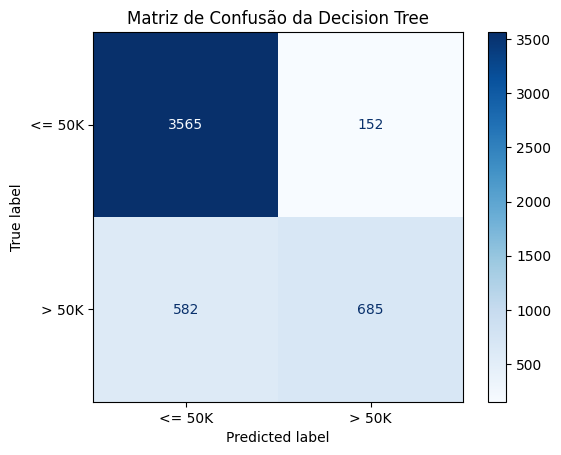

In [ ]:
# Tamanho do conjunto de teste
print(f"Test Size: {len(x_test)}")

# Matriz de confusão
cm = confusion_matrix(y_test, dt_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<= 50K', '> 50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusão da Decision Tree")
plt.grid(False)
plt.show()

Após análise da matriz de confusão gerada para o desempenho do Decision Tree, é perceptível como o modelo teve um número considerável de acertos, principalmente no que tange aos labels de renda inferior à 50K (quadrante superior esquedo).

### 3.5. Gráfico de Importâncias

O gráfico de importâncias é uma ferramenta que permite uma visualização simplificada da importância de cada atributo na tomada de decisões do modelo. Para isso, utiliza-se dos dados numéricos de importância gerados após o *GridSearch*⁽⁴⁾.

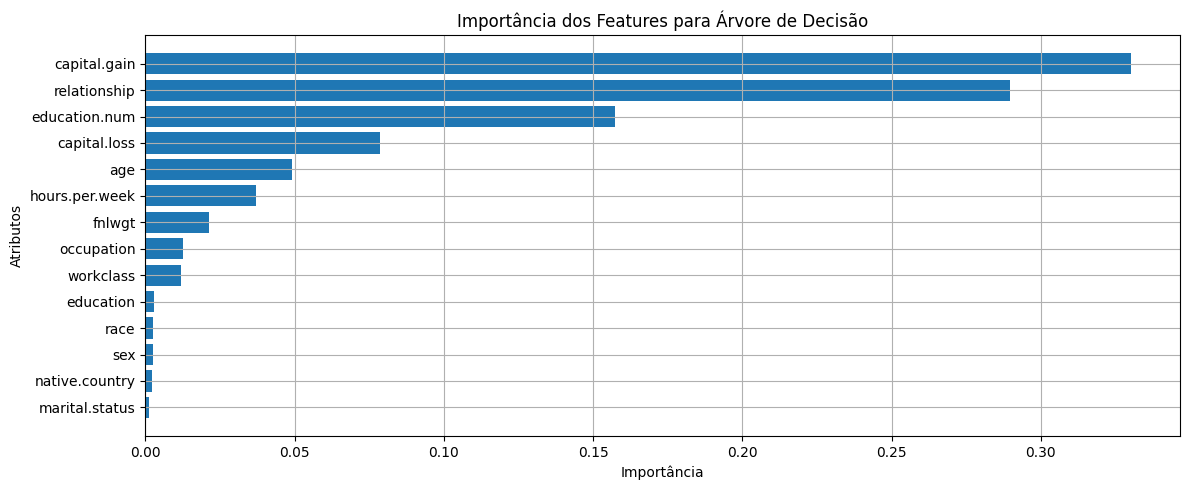

In [ ]:
# Ordenando os elementos
indices = np.argsort(dt_best.feature_importances_)[::-1] # Ordena os índices de forma decrescente
sorted_features = x_train.columns[indices] # Ordena os nomes
sorted_importances = dt_best.feature_importances_[indices] # Ordena as importâncias

# Plotando gráfico de importâncias
plt.figure(figsize=(12, 5))
plt.title("Importância dos Features para Árvore de Decisão")
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Importância")
plt.ylabel("Atributos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid()
plt.show()

Aqui, é perceptível que atributos como "ganho de capital" tiveram grande impacto, enquanto atributos como "estado civil" e "país de origem" tiveram pequeno impacto na tomada de decisões do *Decision Tree*, considerando os parâmetros definidos nesse contexto.

## **4. Modelo Random Forest**



*Random Forest*⁽³⁾ é um tipo específico de *Decision Tree*⁽²⁾, no qual há múltiplas árvores de decisão em funcionamento simultaneamente, dotadas de um treinamento com diferentes subconjuntos de dados. Ela possui as mesmas vantagens de uma árvore de decisão, além de ser mais robusta e estável, e de tender a reduzir a ocorrência de *overfitting*.

### 4.1. Preparação para o treinamento

In [ ]:
# Importação de bibliotecas relacionadas ao modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier # Classificador (Random Forest)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Métricas de avaliação

In [ ]:
# Definição dos hiperparâmetros para o GridSearch
rf_param_grid = {
    'n_estimators': [100, 200, 500], # Número de árvores
    'max_depth': [10, 20, 30], # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 5], # Número mínimo de amostras por folha
    'max_features': ['log2', 'sqrt', 0.5] # Features consideradas para split
}

In [ ]:
# Criação do modelo de classificação
rf = RandomForestClassifier(random_state=random_state)

### 4.2. *GridSearch* e treinamento

O *GridSearch*⁽⁴⁾ é uma ferramenta que permite a execução de uma Validação Cruzada no conjunto de parâmetros definido anteriormente. Assim, será possível definir os parâmetros que maximizam a eficácia do modelo, dentre os fornecidos.

In [ ]:
# Aplicação do GridSearch com validação cruzada
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_param_grid, n_jobs = -1) # Prepara o GridSearch
rf_grid.fit(x_train, y_train) # Executa o GridSearch no conjunto de treino

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['log2', 'sqrt', 0.5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# Visualização dos atributos ótimos da GridSearch
print('Atributos Ótimos:\n') # Título
print(f'Hiperparâmetros: {rf_grid.best_params_}') # Melhores hiperparâmetros encontrados
print(f'Score da Validação Cruzada: {rf_grid.best_score_:.4f}') # Melhor score da validação cruzada

Atributos Ótimos:

Hiperparâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Score da Validação Cruzada: 0.8671


### 4.3. Predição e avaliação do modelo

Ainda com o auxílio do *GridSearch*⁽³⁾, separa-se o modelo já treinado com os valores ótimos, dentre os fornecidos, na variável "*best*", a fim de avaliar a sua predição com as métricas Acurácia, *Precision*, *Recall* e *F1-score*.

In [ ]:
# Otimização e predição do modelo
rf_best = rf_grid.best_estimator_ # Modelo com os parâmetros ótimos
rf_preds = rf_best.predict(x_test) # Predição do modelo com os parâmetros ótimos

In [ ]:
# Visualização das métricas de avaliação
print(f"Acurácia:  {accuracy_score(y_test, rf_preds):.4f}") # Acurácia
print(f"Precision: {precision_score(y_test, rf_preds):.4f}") # Precision
print(f"Recall:    {recall_score(y_test, rf_preds):.4f}") # Recall
print(f"F1-score:  {f1_score(y_test, rf_preds):.4f}") # F1-score

Acurácia:  0.8682
Precision: 0.8081
Recall:    0.6314
F1-score:  0.7089


### 4.4. Matriz de Confusão

A matriz de confusão é uma ferramenta que permite uma visualização simplificada da comparação entre os valores previstos pelo modelo (*Predicted label*) e os esperados (*True label*) por meio de quadrantes. Aqui, ela é gerada através das bibliotecas *Matplotlib* e *scikit-learn*.

Test Size: 4984


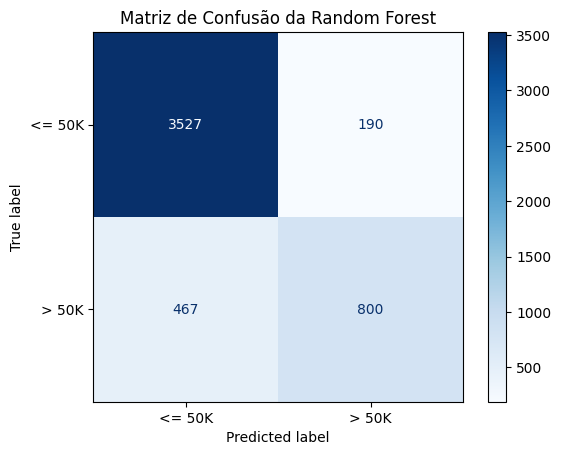

In [ ]:
# Tamanho do conjunto de teste
print(f"Test Size: {len(x_test)}")

# Matriz de confusão
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<= 50K', '> 50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusão da Random Forest")
plt.grid(False)
plt.show()

Após análise da matriz de confusão gerada para o desempenho do *Random Forest*, é perceptível como o modelo teve um número considerável de acertos, principalmente no que tange aos labels de renda inferior à 50K (quadrante superior esquedo).

### 4.5. Gráfico de Importâncias

O gráfico de importâncias é uma ferramenta que permite uma visualização simplificada da importância de cada atributo na tomada de decisões do modelo. Para isso, utiliza-se dos dados numéricos de importância gerados após o *GridSearch*⁽⁴⁾.

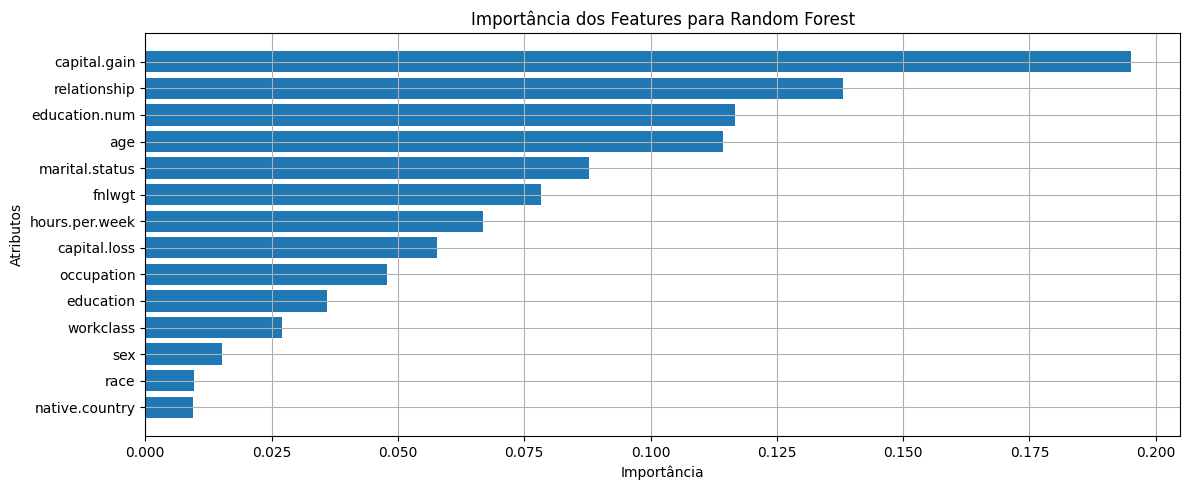

In [ ]:
# Ordenando os elementos
indices = np.argsort(rf_best.feature_importances_)[::-1] # Ordena os índices de forma decrescente
sorted_features = x_train.columns[indices] # Ordena os nomes
sorted_importances = rf_best.feature_importances_[indices] # Ordena as importâncias

# Plotando gráfico de importâncias
plt.figure(figsize=(12, 5))
plt.title("Importância dos Features para Random Forest")
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Importância")
plt.ylabel("Atributos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid()
plt.show()

Aqui, é perceptível que atributos como "ganho de capital" e "relação familiar" tiveram grande impacto, enquanto atributos como "raça" e "país de origem" tiveram pequeno impacto na tomada de decisões do *Random Forest*, considerando os parâmetros definidos nesse contexto.

## **5. Conclusão**

Após o tratamento do *dataset* abordado, o qual sofreu imputação pela moda e codificação, e treinamento de ambos os modelos de árvore elaborados utilizando-se da Validação Cruzada com a ferramenta *GridSearch*⁽⁴⁾, e análise das métricas de avaliação, matrizes de confusão e gráficos de importância, foi possível extrair informações relevantes acerca dos modelos.

Assim, os dois foram capazes de produzir resultados próximos e satisfatórios no que tange a acurácia, a qual atingiu um valor de aproximadamente 86% em ambos. Na matriz de confusão, ficou claro que os dois modelos tiveram uma facilidade significativamente maior para identificar indivíduos com a renda menor ou igual a 50 mil dólares em comparação com indivíduos com a renda maior que essa.

## **6. Referências**

- 1. **Adult Census Income**. Kaggle. Disponível em: https://www.kaggle.com/datasets/uciml/adult-census-income. Acesso em: 11 maio 2025.
- 2. **What is a decision tree?**. International Business Machines Corporation. Disponível em: https://www.ibm.com/think/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes. Acesso em: 11 maio 2025.
- 3. BEHESHTI, N. **Random Forest Regression**. towards data science. Disponível em: https://towardsdatascience.com/random-forest-regression-5f605132d19d/. Acesso em: 11 maio 2025.
- 4. OKAMURA, S. **GridSearchCV for Beginners**. towards data science. Disponível em: https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/. Acesso em: 11 maio 2025.